In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('aapl_2014_2023.csv')

In [3]:
data

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,185.398801,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,185.682801,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,185.971400,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,186.300001,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish


In [5]:
data = data.dropna()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [550]:
x = data[['ema_50','rsi_7','rsi_14','cci_7','cci_14','sma_50','sma_100','ema_100','macd','bollinger','TrueRange','atr_7','atr_14']]
y = np.array(data['close']).reshape(-1,1)

In [551]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [552]:
model = LinearRegression()

In [553]:
model.fit(x_train,y_train)

LinearRegression()

In [554]:
y_pred = model.predict(x_test)

In [555]:
import matplotlib.pyplot as plt

In [556]:
actual_data = np.array(y_test).reshape(-1,1)
predicted_data = np.array(y_pred).reshape(-1,1)

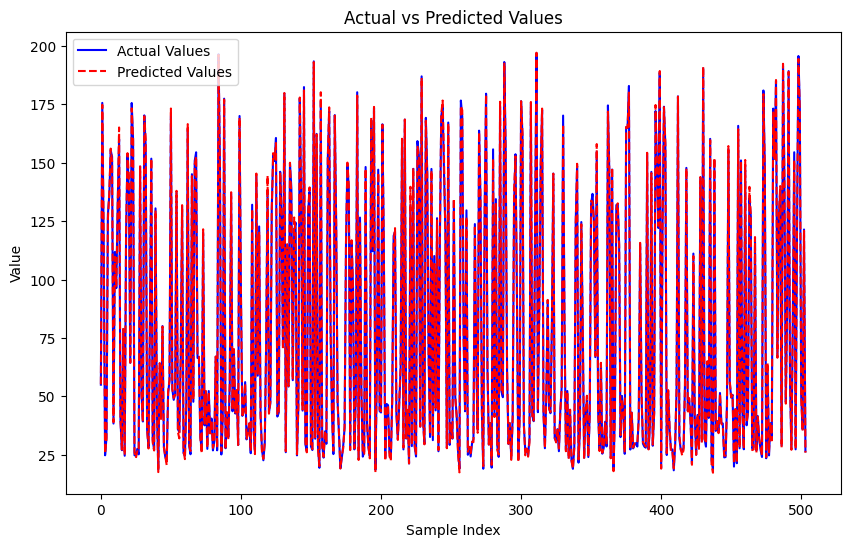

In [557]:
plt.figure(figsize=(10, 6))
plt.plot(actual_data, label='Actual Values', color='b')
plt.plot(predicted_data, label='Predicted Values', color='r', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [558]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(actual_data, predicted_data)
mae = mean_absolute_error(actual_data, predicted_data)
r2 = r2_score(actual_data, predicted_data)


In [559]:
mse

1.747950604243184

In [560]:
mae

0.9054068211447528

In [561]:
r2

0.9994385707488176

In [562]:
from sklearn.ensemble import RandomForestRegressor

In [563]:
new_model = RandomForestRegressor(n_estimators = 10)

In [564]:


new_model.fit(x_train,y_train)

C:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10)

In [565]:
new_predictions =new_model.predict(x_test)
new_predictions = np.array(new_predictions).reshape(-1,1)
new_actual_data = np.array(y_test).reshape(-1,1)

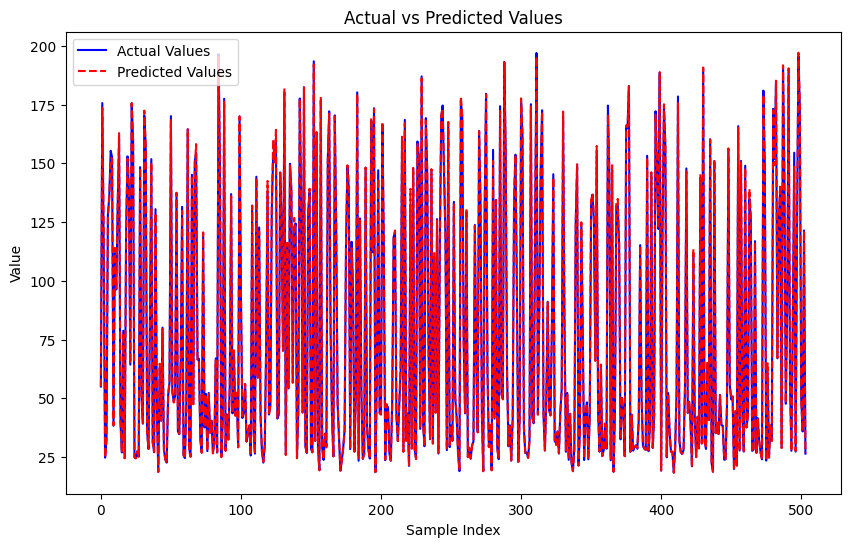

In [566]:
plt.figure(figsize=(10, 6))
plt.plot(new_actual_data, label='Actual Values', color='b')
plt.plot(new_predictions, label='Predicted Values', color='r', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [567]:
mse = mean_squared_error(new_actual_data, new_predictions)
mae = mean_absolute_error(new_actual_data, new_predictions)
r2 = r2_score(new_actual_data, new_predictions)

In [568]:
mse

1.4217109585046142

In [569]:
mae

0.6546766686507939

In [570]:
r2

0.999543356593205

In [571]:
from sklearn.tree import DecisionTreeRegressor

In [572]:
decision_tree = DecisionTreeRegressor()

In [573]:
decision_tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [574]:
decision_tree_predictions = decision_tree.predict(x_test)

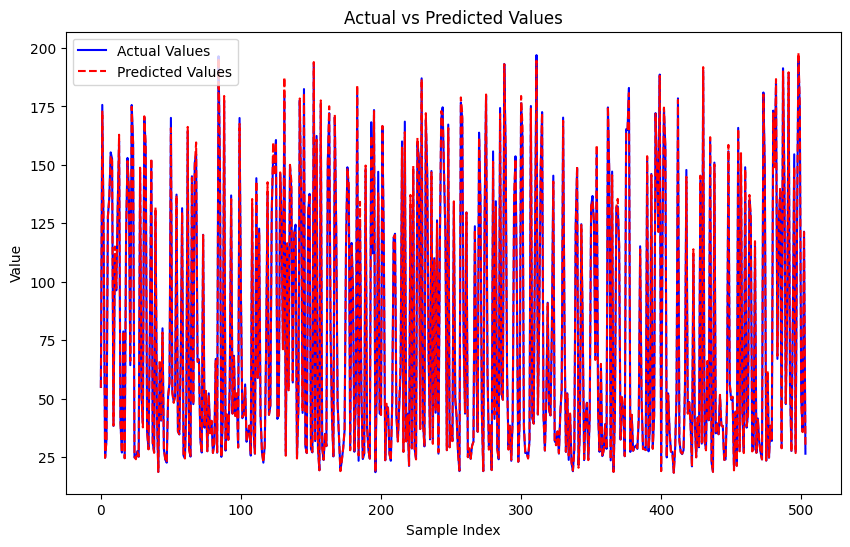

In [575]:
plt.figure(figsize=(10, 6))
plt.plot(new_actual_data, label='Actual Values', color='b')
plt.plot(decision_tree_predictions, label='Predicted Values', color='r', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [576]:
mse = mean_squared_error(new_actual_data, decision_tree_predictions)
mae = mean_absolute_error(new_actual_data, decision_tree_predictions)
r2 = r2_score(new_actual_data, decision_tree_predictions)

In [577]:
mse

2.1814340364462583

In [578]:
mae

0.8434984107142861

In [579]:
r2

0.9992993389660939

In [580]:
data

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,234684800,44.149614,50.996175,-105.071637,-42.411877,19.282236,19.265060,18.372604,18.484713,0.194637,19.979268,0.321428,0.305722,0.316301,bearish
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,392467600,33.094332,43.883529,-152.150999,-124.511983,19.297314,19.267243,18.398896,18.501371,0.132887,19.936375,0.473929,0.329752,0.327561,bullish
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,412610800,37.525661,45.858019,-132.306490,-130.122350,19.310864,19.273472,18.418311,18.519794,0.091398,19.893571,0.471428,0.349991,0.337837,bearish
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,317209200,34.055624,43.675708,-89.587009,-108.089019,19.316671,19.274008,18.433146,18.535080,0.046768,19.857893,0.287141,0.341013,0.334216,bullish
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,258529600,39.768497,46.104107,-58.525539,-82.150032,19.329171,19.279313,18.449414,18.552493,0.021012,19.816875,0.245355,0.327347,0.327868,bearish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,185.398801,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,185.682801,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,185.971400,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,186.300001,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish


In [581]:
data.tail(100)

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,target
2416,2023-08-09,180.869995,180.929993,177.009995,178.190002,60378500,18.273983,30.098371,-75.508550,-136.431212,187.418401,185.658196,177.025900,177.884495,-1.683970,190.684001,3.919998,3.789519,3.419171,neutral
2417,2023-08-10,179.479996,180.750000,177.600006,177.970001,54686900,17.986597,29.838429,-62.885845,-106.403964,187.431801,185.356699,177.255600,177.886188,-2.246831,190.055501,3.149994,3.698158,3.399944,neutral
2418,2023-08-11,177.320007,178.619995,176.550003,177.789993,51988100,17.720570,29.613073,-68.529867,-96.292095,187.442600,185.059965,177.459500,177.884283,-2.676573,189.410501,2.069992,3.465563,3.304948,bullish
2419,2023-08-14,177.970001,179.690002,177.309998,179.460007,43675600,29.074663,34.551684,-37.011741,-73.031507,187.430001,184.840359,177.661300,177.915486,-2.849543,188.684001,2.380004,3.310483,3.238880,bearish
2420,2023-08-15,178.880005,179.479996,177.050003,177.449997,43622600,24.355335,31.671354,-94.201692,-70.486671,187.360001,184.550541,177.857500,177.906268,-3.112930,187.870001,2.429993,3.184699,3.181103,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,43.616382,54.609714,-125.833264,-50.518147,185.398801,188.226229,181.768301,183.982764,2.636317,193.668500,2.440003,2.744973,2.790613,neutral
2512,2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,40.755941,53.026883,-128.310846,-89.108636,185.682801,188.415396,181.787101,184.162313,2.306308,193.831501,1.059997,2.504262,2.666998,neutral
2513,2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,41.568718,53.291938,-115.745604,-116.860553,185.971400,188.601067,181.898701,184.340287,2.029448,193.969001,2.410004,2.490796,2.648641,neutral
2514,2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,45.331639,54.481470,-36.040033,-56.848224,186.300001,188.796319,182.046001,184.523252,1.823710,194.179501,1.510010,2.350684,2.567310,bearish


In [645]:
new_model = RandomForestRegressor(n_estimators = 2515)
new_model.fit(x_train,y_train)

C:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=2515)

In [651]:
tail_data = np.array(data[['ema_50','rsi_7','rsi_14','cci_7','cci_14','sma_50','sma_100','ema_100','macd','bollinger','TrueRange','atr_7','atr_14']].tail(500))
predict = np.array(new_model.predict(tail_data)).reshape(-1,1)
actual = np.array(data['close'].tail(500))

C:\Users\athar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


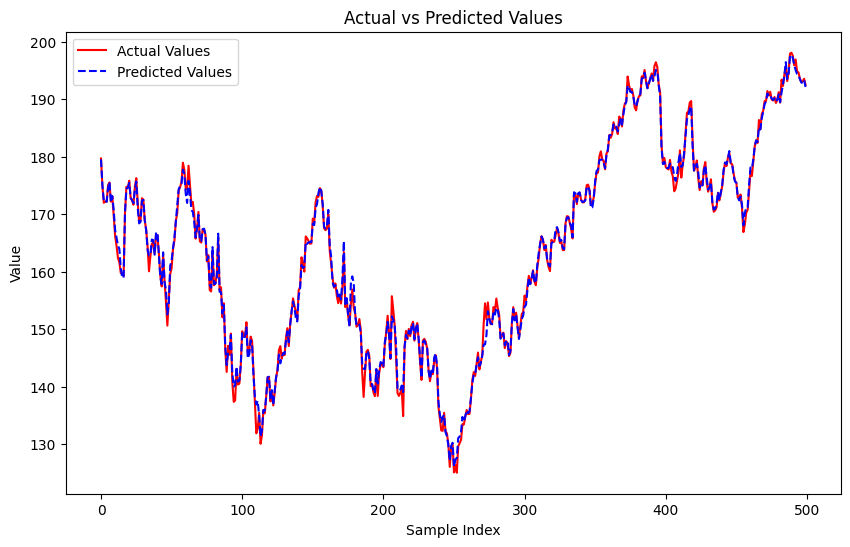

In [652]:




plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual Values', color='r')
plt.plot(predict, label='Predicted Values', color='b', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [653]:
actual

array([179.699997, 174.919998, 172.      , 172.169998, 172.190002,
       175.080002, 175.529999, 172.190002, 173.070007, 169.800003,
       166.229996, 164.509995, 162.410004, 161.619995, 159.779999,
       159.690002, 159.220001, 170.330002, 174.779999, 174.610001,
       175.839996, 172.899994, 172.389999, 171.660004, 174.830002,
       176.279999, 172.119995, 168.639999, 168.880005, 172.789993,
       172.550003, 168.880005, 167.300003, 164.320007, 160.070007,
       162.740005, 164.850006, 165.119995, 163.199997, 166.559998,
       166.229996, 163.169998, 159.300003, 157.440002, 162.949997,
       158.520004, 154.729996, 150.619995, 155.089996, 159.589996,
       160.619995, 163.979996, 165.380005, 168.820007, 170.210007,
       174.070007, 174.720001, 175.600006, 178.960007, 177.770004,
       174.610001, 174.309998, 178.440002, 175.059998, 171.830002,
       172.139999, 170.089996, 165.75    , 167.660004, 170.399994,
       165.289993, 165.070007, 167.399994, 167.229996, 166.419

In [654]:
predict

array([[179.54681122],
       [174.99056341],
       [172.30406351],
       [172.48402302],
       [172.17425186],
       [174.58582287],
       [175.60968181],
       [172.06767583],
       [173.17747584],
       [170.69932176],
       [167.23474971],
       [165.93637   ],
       [164.52999448],
       [163.96922988],
       [160.59213529],
       [159.00212025],
       [158.93843814],
       [170.32550394],
       [174.43182094],
       [174.65411959],
       [175.46610912],
       [172.84233429],
       [172.43804655],
       [171.940332  ],
       [174.42370654],
       [175.67949843],
       [171.10951143],
       [168.40840949],
       [168.66981269],
       [172.41185701],
       [172.48922253],
       [168.8942144 ],
       [167.19529869],
       [163.79429465],
       [162.79105557],
       [162.92231367],
       [165.60756907],
       [165.48936426],
       [162.95809381],
       [166.85888059],
       [166.78734899],
       [162.82096099],
       [159.01826105],
       [157

In [655]:
mse = mean_squared_error(actual, predict)
mae = mean_absolute_error(actual, predict)
r2 = r2_score(actual, predict)
print(mse,mae,r2)

0.9789494838944939 0.6049361685799685 0.9968698862097202
